In [1]:
import sys 
sys.path.append("/scratch/m/murray/dtolgay")
from tools import functions_readfiles as read_files
from tools.functions_importing_observations import read_CO_observations

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [4]:
base_fdir = "/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/runs_hden_radius/firebox/z0.0/gal0/voronoi_1e6"

runs = {
    # "hybridNDInterp": {
    #     "file_path": f"{base_fdir}/L_line_smoothingLength_hybridInterpolator_flux2Luminosity.txt",
    #     "data": pd.DataFrame(),
    #     "label": "hybridND",        
    # },
    # "nearestNDInterp": {
    #     "file_path": f"{base_fdir}/L_line_smoothingLength_nearestNDInterpolator_flux2Luminosity.txt",
    #     "data": pd.DataFrame(),
    #     "label": "nearestND",
    # },    
    # "regularGridInterp": {
    #     "file_path": f"{base_fdir}/abundance_regularGridInterpolator_linear_smoothingLength.txt",
    #     "data": pd.DataFrame(),
    #     "label": "regularGridND",
    # },
    "rbfInterpolator": {
        "file_path": f"{base_fdir}/abundance_RBFInterpolator_smoothingLength.txt",
        "data": pd.DataFrame(),
        "label": "rbf"
    },
    "rbfInterpolator_new": {
        "file_path": f"{base_fdir}/abundance_RBFInterpolator_smoothingLength_2.txt",
        "data": pd.DataFrame(),
        "label": "rbf_new"
    }

}

for run in runs.keys():   
    try:
        runs[run]["data"], file_specific_columns = read_files.read_interpolated_files_usingFilePath(path=runs[run]["file_path"], interpolation_type="abundance")
    except:
        print("I am in the exception")
        runs[run]["data"], file_specific_columns = read_files.read_interpolated_files_usingFilePath2(path=runs[run]["file_path"], interpolation_type="abundance")
#     runs[run]["data"], file_specific_columns = read_files.read_interpolated_Lline_usingFilePath(path=runs[run]["file_path"], interpolation_type="abundance")
#     runs[run]["data"], file_specific_columns = read_files.read_interpolated_Lline_usingFilePath(path=runs[run]["file_path"], interpolation_type="temperature")


I am in the exception


# Import observations

In [5]:
XCOLDGASS_df, PHIBBS2_df, ALMA_df, Leroy_df = read_CO_observations(base_dir="/home/m/murray/dtolgay/Observations")

I am in the function XCold_Gass_data_reading
I am in the function PHIBSS2_data_reading
I am in the function ALMA_2019_Data_Reading
I am in the function Leroy_data_reading
average_radius_r25_times_075_LEROY:  8.886206896551723


# Compare

In [ ]:
line_name = "L_co_10"



fig, ax = plt.subplots(figsize=(7, 4), dpi=200, facecolor = "white")

# ############ xCOLDGASS

cond_FLAG_1 = (XCOLDGASS_df["FLAG_CO"] == 1).astype(bool)
cond_FLAG_2 = (XCOLDGASS_df["FLAG_CO"] == 2).astype(bool)
ax.scatter(
    XCOLDGASS_df.loc[cond_FLAG_1, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_1, 'Lco'], 
    facecolors='none', edgecolors='tab:blue', label="Saintonge+17", s=10,
)
ax.scatter(
    XCOLDGASS_df.loc[cond_FLAG_2, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_2, 'Lco'], 
    marker=r"$\downarrow$", s=10, facecolors='none', edgecolors='tab:cyan', label=r"Saintonge+17 3$\sigma$ upper limit"
)


for run in runs.keys():
    ax.scatter(
        sum(runs[run]['data']['sfr']),
        sum(runs[run]['data'][line_name]),
        label = runs[run]['label'],
    )


## Figure options
axes_number_size = 16

plt.yscale("log")
plt.xscale("log")

# plt.grid(which = "minor")

plt.xlabel("SFR [$M☉/yr$]")
plt.ylabel(fr"{line_name} [$K$ $km$ $s^{-1}$ $pc^2$]")

ymin = 1e4
ymax = 1e10
difference_in_log_space = int(np.log10(ymax/ymin))
yticks = 10**np.linspace(start = np.log10(ymin), stop = np.log10(ymax), num=difference_in_log_space+1)

plt.ylim([ymin, ymax])
plt.yticks(yticks)
plt.legend()

plt.xlim([2e-2, 2e2])
plt.xticks([1e-1, 1e0, 1e1])


# # Customize major ticks
ax.tick_params(axis='both', which='major', labelsize=axes_number_size, length=7, width=2, colors='black', direction = "in")
ax.tick_params(axis='both', which='minor', labelsize=axes_number_size, length=5, width=1, colors='black', direction = "in")

plt.show()

# Abundance

In [11]:
for key, value in runs.items():
    data = value["data"]
    value["data"]['Mco'] = data['mass'] * data['fCO'] # Msolar 
    value["data"]['Mh2'] = data['mass'] * data['fh2'] # Msolar



    print(f"{key} -- {sum(value['data']['Mco']):.2e} -- {sum(value['data']['Mh2']):.2e}")

rbfInterpolator -- 3.75e+07 -- 8.88e+09
rbfInterpolator_new -- 3.98e+06 -- 5.51e+09


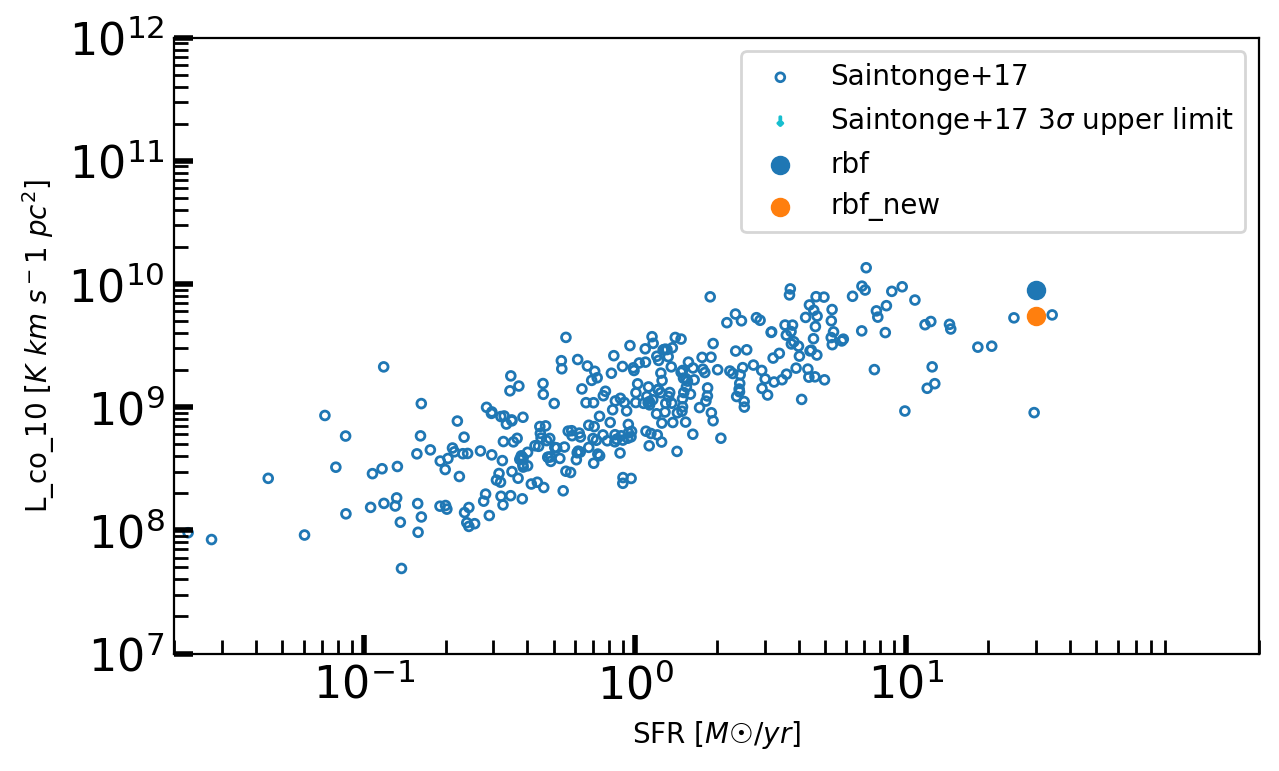

In [14]:

fig, ax = plt.subplots(figsize=(7, 4), dpi=200, facecolor = "white")

# ############ xCOLDGASS

cond_FLAG_1 = (XCOLDGASS_df["FLAG_CO"] == 1).astype(bool)
cond_FLAG_2 = (XCOLDGASS_df["FLAG_CO"] == 2).astype(bool)
ax.scatter(
    XCOLDGASS_df.loc[cond_FLAG_1, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_1, 'Mh2'], 
    facecolors='none', edgecolors='tab:blue', label="Saintonge+17", s=10,
)
ax.scatter(
    XCOLDGASS_df.loc[cond_FLAG_2, 'SFR'], XCOLDGASS_df.loc[cond_FLAG_2, 'Mh2'], 
    marker=r"$\downarrow$", s=10, facecolors='none', edgecolors='tab:cyan', label=r"Saintonge+17 3$\sigma$ upper limit"
)


for run in runs.keys():
    ax.scatter(
        sum(runs[run]['data']['sfr']),
        sum(runs[run]['data']['Mh2']),
        label = runs[run]['label'],
    )


## Figure options
axes_number_size = 16

plt.yscale("log")
plt.xscale("log")

# plt.grid(which = "minor")

plt.xlabel("SFR [$M☉/yr$]")
plt.ylabel(fr"{line_name} [$K$ $km$ $s^{-1}$ $pc^2$]")

ymin = 1e7
ymax = 1e12
difference_in_log_space = int(np.log10(ymax/ymin))
yticks = 10**np.linspace(start = np.log10(ymin), stop = np.log10(ymax), num=difference_in_log_space+1)

plt.ylim([ymin, ymax])
plt.yticks(yticks)
plt.legend()

plt.xlim([2e-2, 2e2])
plt.xticks([1e-1, 1e0, 1e1])


# # Customize major ticks
ax.tick_params(axis='both', which='major', labelsize=axes_number_size, length=7, width=2, colors='black', direction = "in")
ax.tick_params(axis='both', which='minor', labelsize=axes_number_size, length=5, width=1, colors='black', direction = "in")

plt.show()